# Keras ConvLSTM2D network

Use a network made of convolutional LSTM layers.

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils.np_utils import to_categorical
from keras.utils import plot_model
import keras.backend as K
import imageio
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
import random

Using TensorFlow backend.


## Model

In [2]:
#kernel_size = (3,3)
#img_input = Input(shape=(None,None,None,1,))
#x = ConvLSTM2D(32, kernel_size, activation='relu', padding='same', return_sequences=True)(img_input)
#x = BatchNormalization()(x)
#x = ConvLSTM2D(32, kernel_size, activation='relu', padding='same', return_sequences=True)(x)
#x = BatchNormalization()(x)
#x = ConvLSTM2D(32, kernel_size, activation='relu', padding='same', return_sequences=True)(x)
#x = BatchNormalization()(x)
#x = ConvLSTM2D(32, kernel_size, activation='relu', padding='same', return_sequences=True)(x)
#x = BatchNormalization()(x)
#x = ConvLSTM2D(1, kernel_size, activation='softmax', padding='same', return_sequences=False)(x)
#model = Model(inputs=img_input, outputs=x)
#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')
#model.summary()

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, None, None, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

model = seq
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, None, None,  59200     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, None, None,  160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, None, None,  115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, None, None,  160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, None, None,  115360    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, None, None,  160       
_________________________________________________________________
conv_lst_m2d_4 (ConvLSTM2D)  (None, None, None, None,  115360    
__________

In [3]:
for layer in model.layers:
    print(layer.output_shape)

(None, None, None, None, 40)
(None, None, None, None, 40)
(None, None, None, None, 40)
(None, None, None, None, 40)
(None, None, None, None, 40)
(None, None, None, None, 40)
(None, None, None, None, 40)
(None, None, None, None, 40)
(None, None, None, None, 1)


In [4]:
model = load_model("model/ConvLSTM-TrainingSequence.h5")

## Data

Full games are represented as image sequences ("movies"). 

The input data is the full game without the last state where all lines are filled in. 
The output data only shows the newly added line in each frame - all pixels are black except for the new line in white.

In [14]:
#sequenceDataset = np.load('TrainingSequence-5x4.npz')
sequenceDataset = np.load('TrainingSequence-3x4.npz')
x_train = sequenceDataset['input_seq']
y_train = sequenceDataset['target_seq']

In [15]:
print(x_train.shape)
print(y_train.shape)

(10000, 31, 11, 9)
(10000, 31, 11, 9)


In [16]:
print(x_train[0,23])
print("-"*80)
print(y_train[0,24])

[[  0   0   0   0   0   0   0   0   0]
 [  0 215   0 215   0 215 255 215   0]
 [  0 255   0   0   0 255  65 255   0]
 [  0 215 255 215 255 215 255 215   0]
 [  0 255 150 255   0   0   0 255   0]
 [  0 215 255 215   0 215   0 215   0]
 [  0 255  65 255   0   0   0 255   0]
 [  0 215 255 215 255 215 255 215   0]
 [  0 255   0 255 150 255 150 255   0]
 [  0 215   0 215 255 215 255 215   0]
 [  0   0   0   0   0   0   0   0   0]]
--------------------------------------------------------------------------------
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]]


In [17]:
val = np.sum(y_train[0,23])
print("val = %d" % val)
assert(abs(val) == 255)

val = 255


In [18]:
x_train = x_train.astype(K.floatx())
y_train = y_train.astype(K.floatx())
x_train /= 255
y_train /= 255

In [19]:
np.set_printoptions(precision=2, suppress=True, linewidth=90)

exampleGameIdx = 42
exampleGameFrame = 23

print(x_train[exampleGameIdx,exampleGameFrame])
print(y_train[exampleGameIdx,exampleGameFrame])

[[0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   1.   0.   0.   0.   1.   0.59 1.   0.  ]
 [0.   0.84 0.   0.84 0.   0.84 1.   0.84 0.  ]
 [0.   1.   0.   0.   0.   1.   0.59 1.   0.  ]
 [0.   0.84 1.   0.84 0.   0.84 1.   0.84 0.  ]
 [0.   1.   0.   0.   0.   1.   0.59 1.   0.  ]
 [0.   0.84 0.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   1.   0.   1.   0.25 1.   0.59 1.   0.  ]
 [0.   0.84 0.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
channel_shape = x_train.shape + (1,)
x_train = x_train.reshape(channel_shape)

# Convert to categorical:
#cat_shape = y_train.shape + (2,)
#y_train = to_categorical(y_train)
#y_train = y_train.reshape(cat_shape)

# Don't convert to categorical:
cat_shape = y_train.shape + (1,)
y_train = y_train.reshape(cat_shape)

print(x_train.shape)
print(y_train.shape)
print(np.transpose(x_train[exampleGameIdx,exampleGameFrame,:,:,0]))
print(np.transpose(y_train[exampleGameIdx,exampleGameFrame,:,:,0]))

(10000, 31, 11, 9, 1)
(10000, 31, 11, 9, 1)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.84 0.   0.84 0.   0.84 0.   0.84 1.   0.84 0.  ]
 [0.   1.   0.   0.   0.   0.   0.   1.   0.25 1.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   1.   0.59 1.   0.59 1.   0.59 1.   0.59 1.   0.  ]
 [0.   0.84 1.   0.84 1.   0.84 1.   0.84 1.   0.84 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Training

In [ ]:
#model.fit(x_train[0:8:1,:,:,:,:], y_train[0:8:1,:,:,:,:], epochs=50, batch_size=16)
model.fit(x_train, y_train, batch_size=10,
        epochs=20, validation_split=0.05)


Train on 9500 samples, validate on 500 samples
Epoch 1/20
9500/9500 [==============================] - 308s - loss: 3.3985e-06 - val_loss: 2.6885e-06
Epoch 2/20
9500/9500 [==============================] - 304s - loss: 2.5038e-06 - val_loss: 2.3002e-06
Epoch 3/20
9500/9500 [==============================] - 304s - loss: 2.1856e-06 - val_loss: 2.0362e-06
Epoch 4/20
9500/9500 [==============================] - 305s - loss: 1.9609e-06 - val_loss: 1.8456e-06
Epoch 5/20
9500/9500 [==============================] - 304s - loss: 1.7875e-06 - val_loss: 1.6922e-06
Epoch 6/20
7780/9500 [=======================>......] - ETA: 54s - loss: 1.6569e-06

(1, 20, 11, 13, 1)
(11, 13)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.68 0.   0.   0.   0.07 0.   0.01 0.   0.19 0.   0.  ]
 [0.   0.04 0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   0.   0.01 0.   0.06 0.   0.31 0.   0.04 0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.84 0.   0.84 1.   0.84 0.   0.84 0.   0.84 0.   0.84 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.84 0.   0.

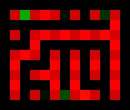

In [50]:
example = random.randrange(x_train.shape[0])
exampleFrame = 20
input_data = np.array([x_train[example,0:exampleFrame,::,::,::]])
prediction = model.predict(input_data)
print(prediction.shape)
prediction = prediction[0,-1, ::, ::, 0]
print(prediction.shape)

print(prediction)

print(x_train[example,exampleFrame,::,::,0])

# create image
target_imgdata = x_train[example,exampleFrame,::,::,0] * 255
target_imgdata = target_imgdata.astype(np.uint8)

prediction_imgdata = prediction * 255
prediction_imgdata = prediction_imgdata.astype(np.uint8)

# merge image data in color channels
tmp = np.zeros(prediction.shape, dtype=np.uint8)
merged_imgdata = np.stack([target_imgdata, prediction_imgdata, tmp], axis=2)
merged_imgdata_large = np.append(target_imgdata, prediction_imgdata, axis=1)
print(merged_imgdata_large.shape)

#create image
img2 = Image.fromarray(merged_imgdata, 'RGB')
img = Image.fromarray(merged_imgdata_large, 'P')
img = img.resize(size=(img.size[0]*10, img.size[1]*10))
img2 = img2.resize(size=(img2.size[0]*10, img2.size[1]*10))

img2

In [46]:
#model.save('model/ConvLSTM-TrainingSequence.h5')

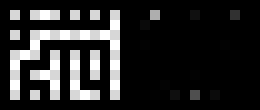

In [51]:
img